1.데이터 가져오기
트레인데이터만 가져와 칼럼확인을 위해 head를 봅니다.

In [1]:
import pandas as pd

file_path = '~/data/data/bike-sharing-demand/train.csv'
train = pd.read_csv(file_path)

train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
각각 생성을 해봅니다. 다만 분초는 필요없을듯 해보입니다!

In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

3. year, month, day, hour, minute, second 데이터 개수 시각화하기

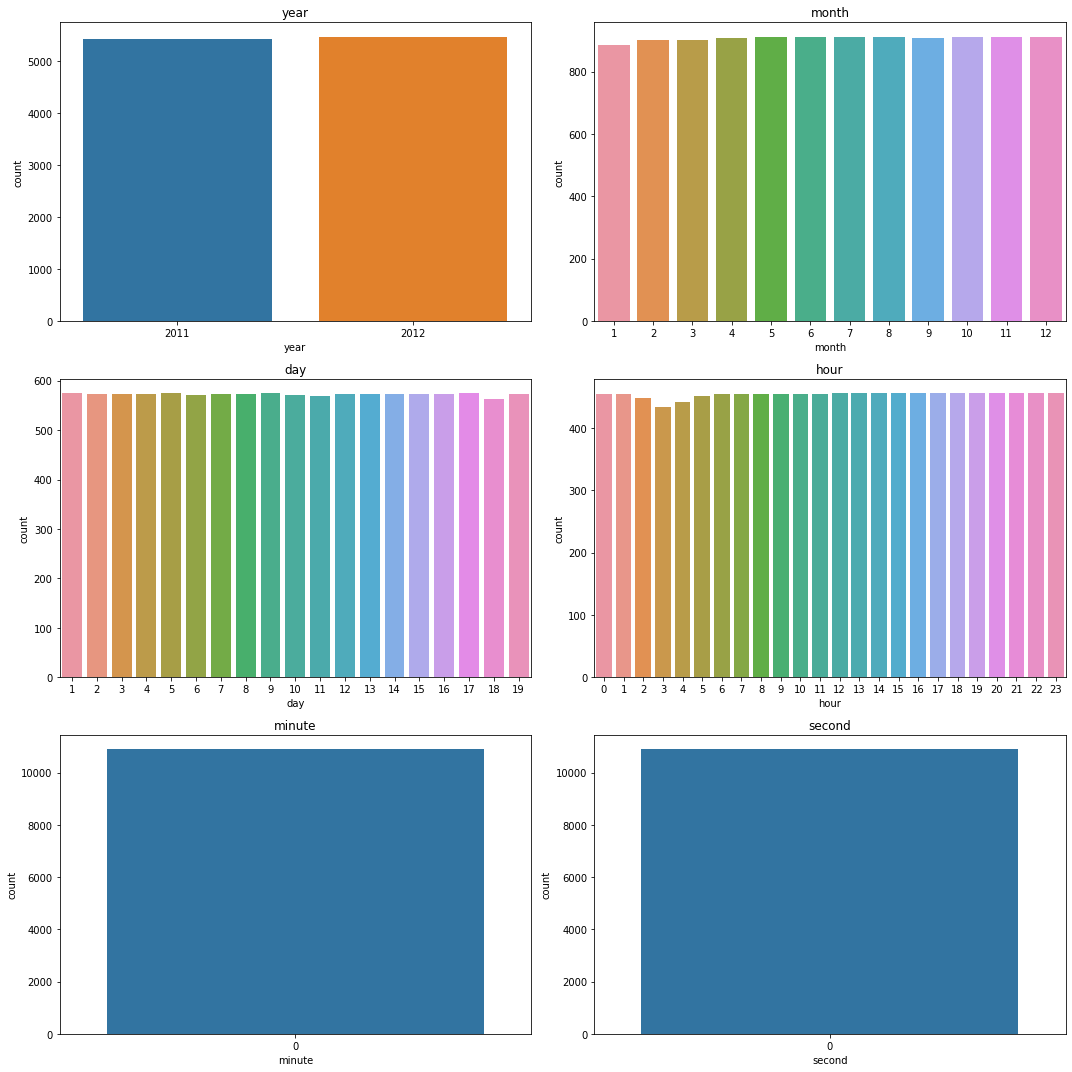

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 데이터 개수 시각화
sns.countplot(ax=axes[0, 0], x='year', data=train)
axes[0, 0].set_title('year')

sns.countplot(ax=axes[0, 1], x='month', data=train)
axes[0, 1].set_title('month')

sns.countplot(ax=axes[1, 0], x='day', data=train)
axes[1, 0].set_title('day')

sns.countplot(ax=axes[1, 1], x='hour', data=train)
axes[1, 1].set_title('hour')

sns.countplot(ax=axes[2, 0], x='minute', data=train)
axes[2, 0].set_title('minute')

sns.countplot(ax=axes[2, 1], x='second', data=train)
axes[2, 1].set_title('second')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()



#데이터가 거의 차이없이 균일하게 있네?? 내가 뭘 잘못이해했나?


일단 시키시니 countplot을 사용하기는 했는데 barplot을 사용해 count와 연관지어 보는게 더 좋지않을까 생각합니다!
또한 데이터를 보니 분초단위는 필요없어 보여서 제거 하는게 좋을것같습니다!!
여기서 확인사살로 분초를 확인해보면 전부 0인걸 볼수 있습니다.



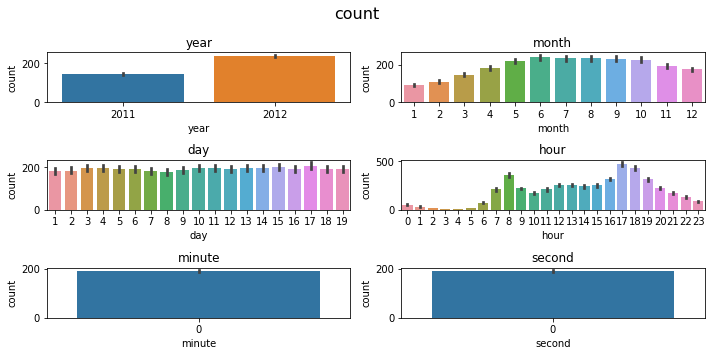

In [4]:
fig, axes = plt.subplots(3, 2,figsize=(10,5))
fig.suptitle("count", fontsize=16)
fig.set_size_inches(10,5)



sns.barplot(data=train, x="year", y='count', ax=axes[0,0])
sns.barplot(data=train, x="month", y='count', ax=axes[0, 1])
sns.barplot(data=train, x="day", y='count', ax=axes[1, 0])
sns.barplot(data=train, x="hour", y='count', ax=axes[1, 1])
sns.barplot(data=train, x="minute", y='count', ax=axes[2, 0])
sns.barplot(data=train, x="second", y='count', ax=axes[2, 1])
axes[0, 0].set(title="year")
axes[0, 1].set(title="month")
axes[1, 0].set(title="day")
axes[1, 1].set(title="hour")
axes[2, 0].set(title="minute")
axes[2, 1].set(title="second")

plt.tight_layout()


casual,registered 컬럼은 둘이 합쳐 count인데 필요없다고 여겨집니다.날씨, 근무일, 계절, 환경과 관련도도 떨어져 보입니다. 일단 시각화해서 판단하겠습니다.

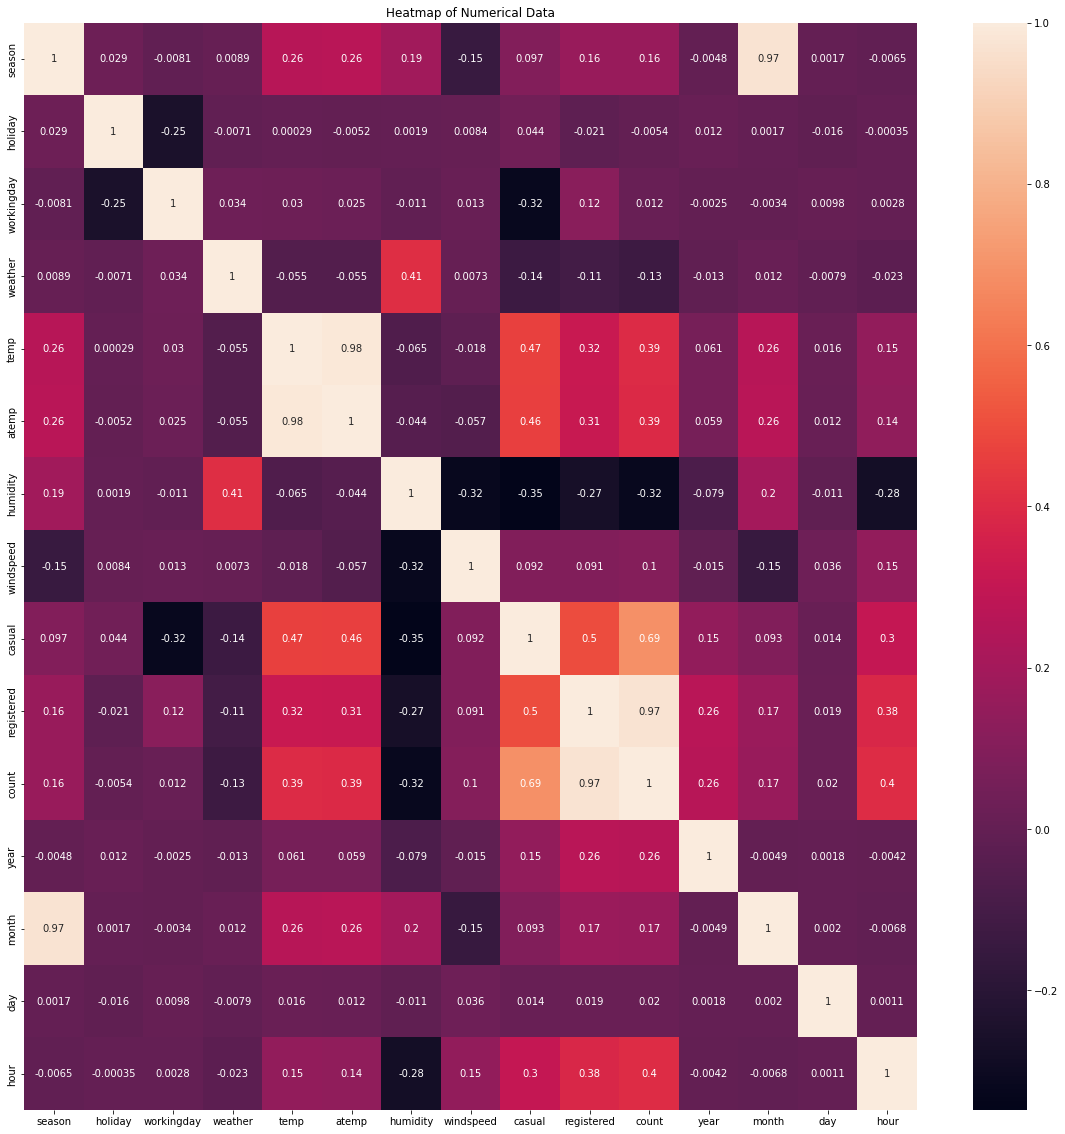

In [5]:
drop_features = ['minute', 'second']
train = train.drop(drop_features, axis=1)


corrMat = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data');

확실히 Count와 연관된것이기에 지워줘도 될것같고, 온도와 체감온도도 거의 같은값임으로 체감온도는 지워줘도 될것같다

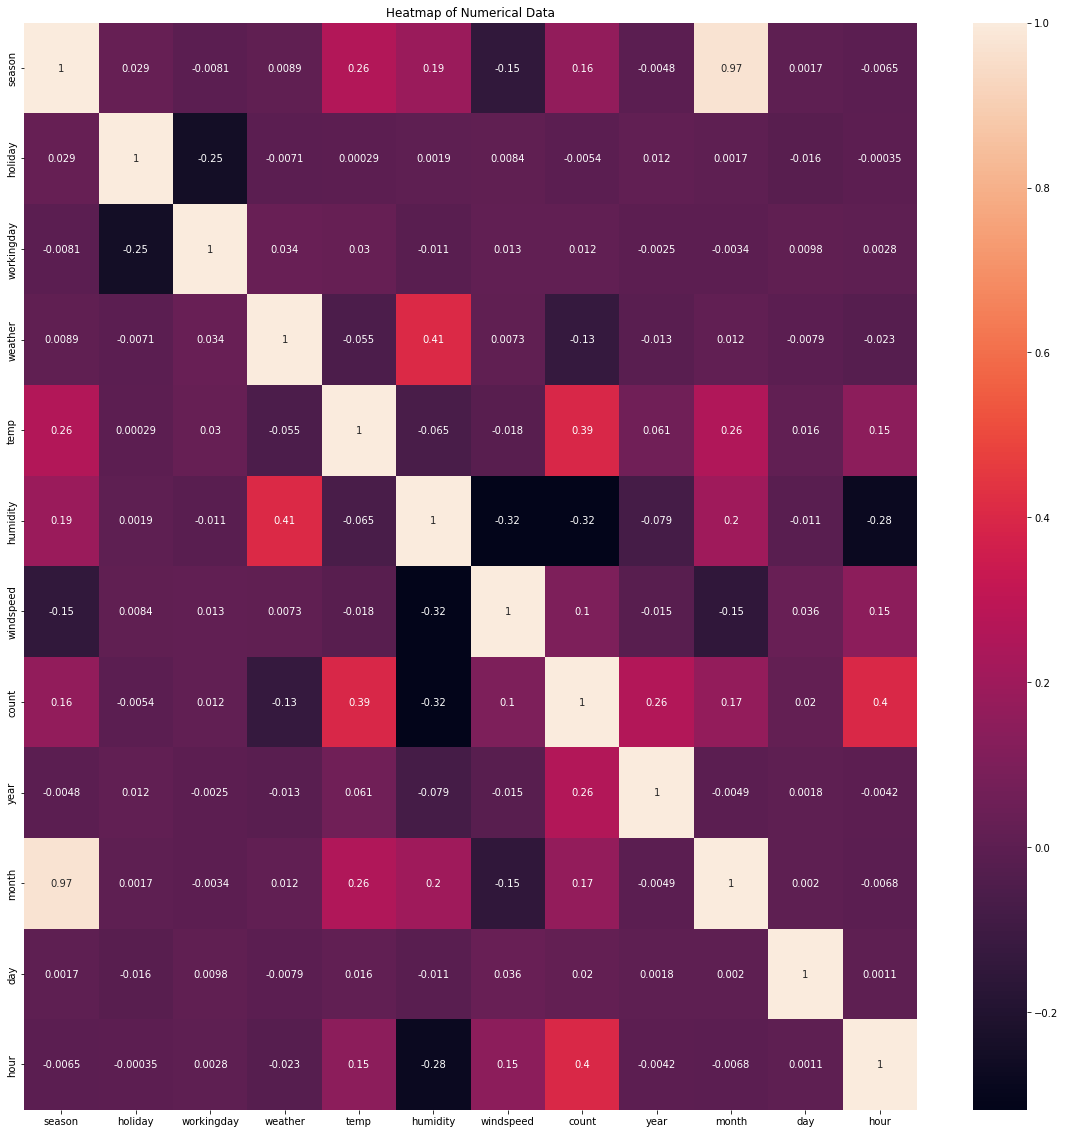

In [6]:
drop_features = ['casual', 'registered', 'atemp']
train = train.drop(drop_features, axis=1)


corrMat = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data');

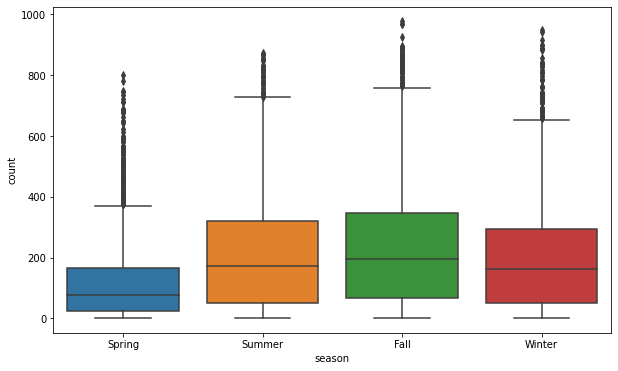

count max: 977
(10886, 13)


In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="season", y="count", data=train)
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("season")
plt.ylabel("count")
plt.show()


max_count = train['count'].max()
print("count max:", max_count)

print(train.shape)




Text(0.5, 1.0, 'tempcount')

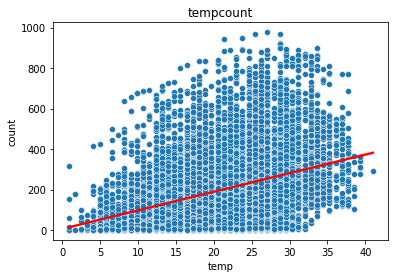

In [8]:
sns.scatterplot(x="temp", y="count", data=train)
sns.regplot(x="temp", y="count", data=train, scatter=False, line_kws={"color":"red"})
plt.title("tempcount")



Text(0.5, 1.0, 'humidity count')

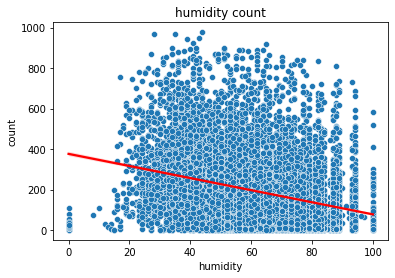

In [9]:
sns.scatterplot(x="humidity", y="count", data=train)
sns.regplot(x="humidity", y="count", data=train, scatter=False, line_kws={"color":"red"})
plt.title("humidity count")



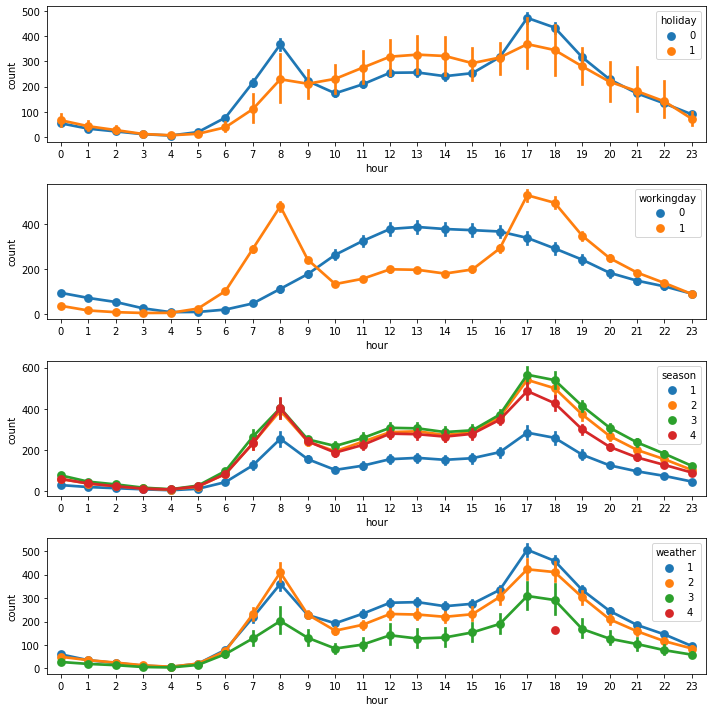

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(10,10))

sns.pointplot(x="hour", y="count", hue="holiday", data=train, ax=axes[0])
sns.pointplot(x="hour", y="count", hue="workingday", data=train, ax=axes[1])
sns.pointplot(x="hour", y="count", hue="season", data=train, ax=axes[2])
sns.pointplot(x="hour", y="count", hue="weather", data=train, ax=axes[3])

plt.tight_layout()

그럼 이제 정제된 데이터를 훈련용과 검증용으로 나누어 보려 한다. 그런데 해당 모델은 시계열데이터에 속함으로 트레인데이터가 시간상으로 앞에 와야한다. 그런데 해당 데이터는 2년치의 자료뿐없기에 년단위로 나누려 한다.이는 시계열데이터의 특징상 전후로 나누어야 함도 그렇지만 계절별 상관관계가 높기에 4계절이 들어가 있도록하기 위해서이다.

In [11]:
# 훈련용 데이터: 첫 번째 해
train_data = train[train['year'] == 2011]

# 검증용 데이터: 두 번째 해
valid_data = train[train['year'] == 2012]


# 특성(X)과 타겟(y) 분리
X_train = train_data[['temp', 'humidity', 'windspeed', 'holiday', "season"]]
y_train = train_data['count']

X_test = valid_data[['temp', 'humidity', 'windspeed', 'holiday', "season"]]
y_test = valid_data['count']


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)
# RMSE 계산
rmse = np.sqrt(mse)




In [13]:
print(y_pred)
print()
print(mse)
print()
print(rmse)

[ 69.79703218  73.34738754  39.45440041 ... 143.5488029  139.99844754
 126.00882104]

40555.80074770297

201.38470832638453


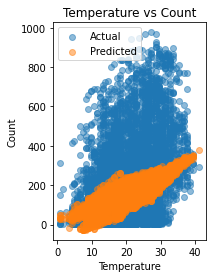

In [14]:
plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['temp'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')
plt.legend()

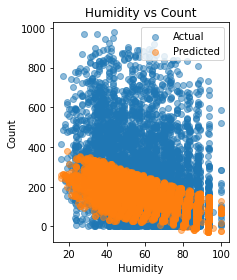

In [16]:
plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test['humidity'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.legend()

plt.tight_layout()
plt.show()